**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)
#plt.imshow(img, cmap='gray', vmin=0, vmax=255);

linhas = img.shape[0]
colunas = img.shape[1];

In [4]:
# code here
def negative(img):
    w = np.max(img)
    return w - img

In [22]:
def logarithmImg(img):
    c = 255/np.log(255)
    max = np.max(img)
    g = c * np.log2(img/max + 1)
    return g

def exponentImg(img, alpha, q):
    A = q / (1-np.exp(-alpha))
    temp = (1 - np.exp(-alpha * img / q))
    return A * temp

alpha = 0.5  # Puedes ajustar el valor de alpha según tus necesidades
q = 255.0  # Puedes ajustar el valor de q según tus necesidades

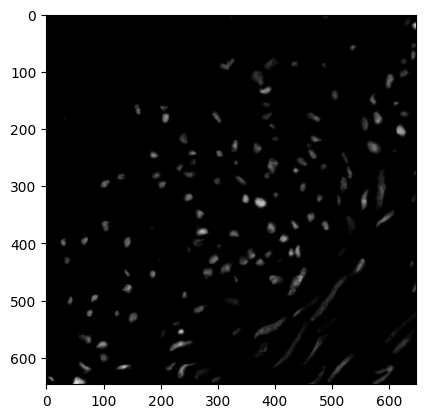

In [23]:
temp = exponentImg(img, alpha, q)
plt.imshow(temp, cmap='gray')

<Figure size 640x480 with 0 Axes>

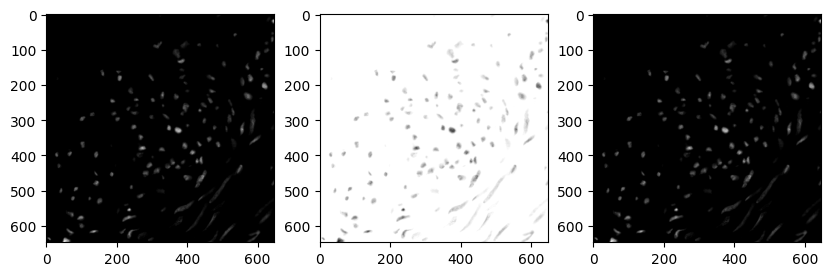

In [19]:
plt.figure()
f, axarr = plt.subplots(1,3, figsize=(10,10))

temp = negative(img)

axarr[0].imshow(img, cmap='gray')
axarr[1].imshow(temp , cmap='gray')
axarr[2].imshow(negative(temp) , cmap='gray')

Resposta: As imagens apresentan a mesma informação, para perpectiva humana a imagem negativa revela details interesantes mas somente é uma vizualização diferente.

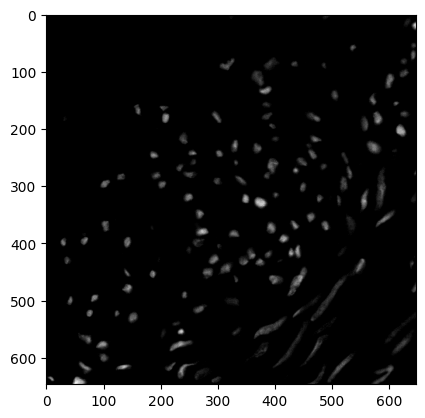

In [24]:
temp = logarithmImg(img)
plt.imshow(temp, cmap='gray')

2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



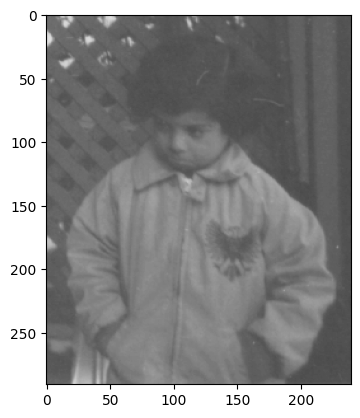

In [3]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255);

linhas = img.shape[0]
colunas = img.shape[1];

In [5]:
def histImg(img):
    dict = { }
    height = img.shape[0]
    weight = img.shape[1]
    for i in range(0,256):
        dict[i] = 0.0
    for i in range(0,height):
        for j in range(0,weight):
            if img[i,j] in dict:
                dict[img[i,j]] = dict[img[i,j]] + 1
            else:
                dict[img[i,j]] = 1
    return dict

def drawHistImg(dict):
    plt.bar(dict.keys(), dict.values())
    plt.show()

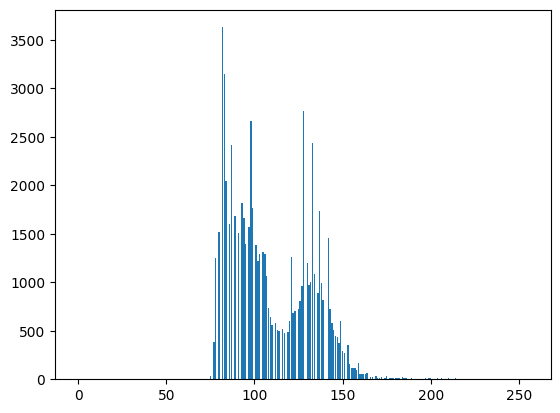

In [6]:
drawHistImg(histImg(img))

[]

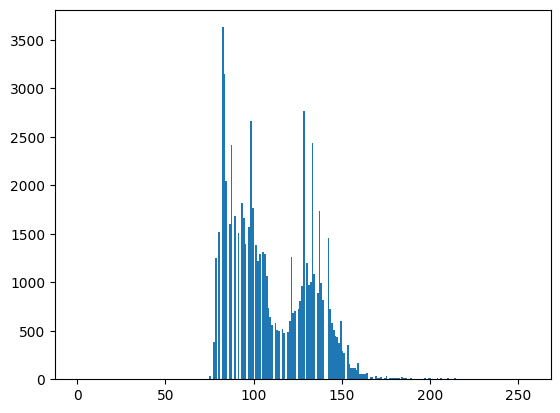

In [7]:
plt.hist(img.ravel(), bins=256, range=(0, 256))
plt.plot()

<Figure size 640x480 with 0 Axes>

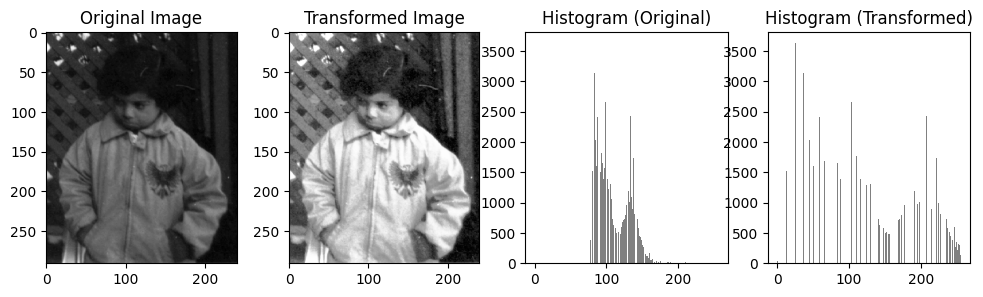

In [23]:
dst = cv2.equalizeHist(img)

plt.figure()
f, axarr = plt.subplots(1,4, figsize=(12,3))

axarr[0].imshow(img, cmap='gray')
axarr[1].imshow(dst, cmap='gray')

hist_img = axarr[2].hist(img.ravel(), bins=256, range=(0, 256), color='gray')
hist_dst = axarr[3].hist(dst.ravel(), bins=256, range=(0, 256), color='gray')

axarr[0].set_title('Original Image')
axarr[1].set_title('Transformed Image')
axarr[2].set_title('Histogram (Original)')
axarr[3].set_title('Histogram (Transformed)')

plt.show()

3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

In [7]:
dict1 = histImg(img)
dict1

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 51: 0.0,
 52: 0.0,
 53: 0.0,
 54: 0.0,
 55: 0.0,
 56: 0.0,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 0.0,
 61: 0.0,
 62: 0.0,
 63: 0.0,
 64: 0.0,
 65: 0.0,
 66: 0.0,
 67: 0.0,
 68: 0.0,
 69: 0.0,
 70: 0.0,
 71: 0.0,
 72: 0.0,
 73: 0.0,
 74: 2.0,
 75: 38.0,
 76: 0.0,
 77: 389.0,
 78: 1245.0,
 79: 0.0,
 80: 1518.0,
 81: 0.0,
 82: 3628.0,
 83: 3146.0,
 84: 2041.0,
 85: 0.0,
 86: 1601.0,
 87: 2415.0,
 88: 0.0,
 89: 1684.0,
 90: 0.0,
 91: 1506.0,
 92: 0.0,
 93: 1813.0,
 94: 1660.0,
 95: 1390.0,
 96: 0.0,
 

In [19]:
def equalizeImage(img):
    dict1 = histImg(img)

    matData = np.zeros((256,7))
    for i in range(0, matData.shape[0]):
        matData[i,0] = i
        matData[i,1] = dict1[i]

    sumTotal = np.sum(matData[:,1])
    sumTemp = 0
    for i in range(0, matData.shape[0]):
        matData[i,2] = matData[i,1] / sumTotal
        sumTemp = sumTemp + matData[i,2]
        matData[i,3] = sumTemp
        matData[i,4] = matData[i,3] * 256
        matData[i,5] = np.floor(matData[i,4])

    sumTemp = 0

    tranDict = {}
    for i in range(0, matData.shape[0]):
        tranDict[i] = matData[i,5]
    dim = img.shape
    newImg = np.zeros(dim)
    for i in range(0, dim[0]):
        for j in range(0, dim[1]):
            newImg[i,j] = tranDict[img[i,j]]
    
    return newImg

In [13]:
def equalizeImage(img, tempDict):
    dim = img.shape
    newImg = np.zeros(dim)
    for i in range(0, dim[0]):
        for j in range(0, dim[1]):
            newImg[i,j] = tempDict[img[i,j]]
    return newImg

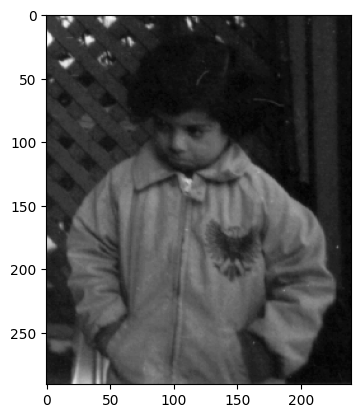

In [16]:
plt.imshow(img, cmap='gray')

<Figure size 640x480 with 0 Axes>

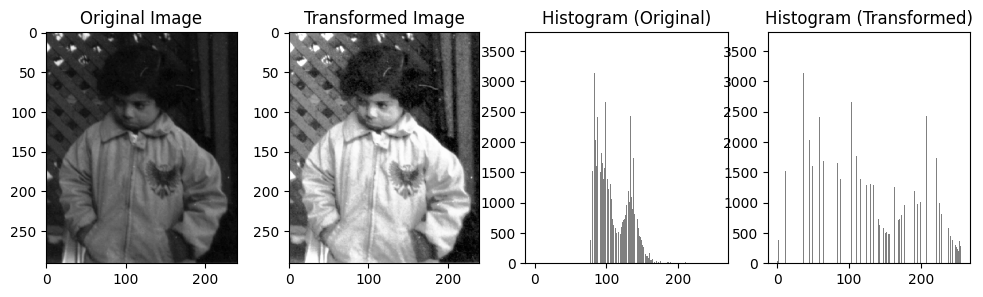

In [20]:
plt.figure()
f, axarr = plt.subplots(1,4, figsize=(12,3))

dst = equalizeImage(img)

axarr[0].imshow(img, cmap='gray')
axarr[1].imshow(dst, cmap='gray')

hist_img = axarr[2].hist(img.ravel(), bins=256, range=(0, 256), color='gray')
hist_dst = axarr[3].hist(dst.ravel(), bins=256, range=(0, 256), color='gray')

axarr[0].set_title('Original Image')
axarr[1].set_title('Transformed Image')
axarr[2].set_title('Histogram (Original)')
axarr[3].set_title('Histogram (Transformed)')

plt.show()

In [54]:
matData[:,4]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         1.,   6.,   6.,  11.,  11.,  24.,  36.,  44.,  44.,  49.,  58.,
        58.,  64.,  64.,  70.,  70.,  77.,  83.,  88.,  88.,  94., 103.,
       110., 110., 115., 119., 124., 124., 129., 134., 137., 140., 142.,
       144., 144., 147., 148., 150., 150., 152., 154., 154., 156., 158.,
       163., 165., 168., 168., 170., 173., 177., 187., 187., 191., 195.,
       199., 207., 211., 211., 215., 221., 225., 228., 228., 228., 233.,
       236., 238., 240., 241., 243., 244., 247., 24

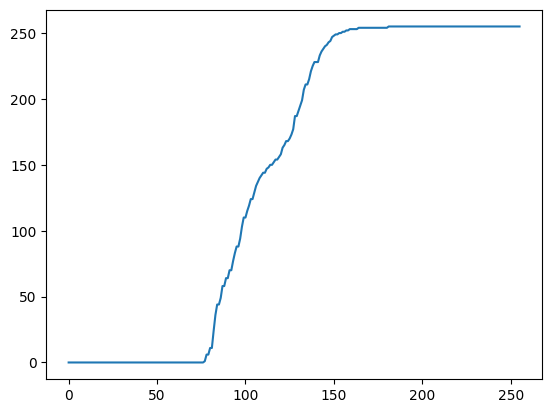

In [57]:
plt.plot(matData[:,5])